> # 🧠 L1 and L2 Regularization 
>
> ## 🌟 What is Regularization?
>
> When we train a machine learning model, sometimes it **learns too much** from the training data — even the **noise or unnecessary patterns**. This is called **overfitting**.
>
> **Regularization** is a technique to **prevent overfitting** by making the model **simpler** and more **general**.
>
> ---
>
> ## 🧮 What is L1 and L2 Regularization?
>
> Regularization works by **penalizing large weights** in the model (weights = the numbers the model learns). These penalties are added to the loss function.
>
> ### ✅ L1 Regularization (Lasso)
> - Adds the **absolute value** of weights to the loss.
> - Encourages some weights to become **exactly zero**.
> - Helps in **feature selection** (removes unimportant features).
> - Makes the model **sparse and simple**.
>
> **Formula**:  
> `Loss = Original Loss + λ * (|w₁| + |w₂| + ...)`
>
> ---
>
> ### ✅ L2 Regularization (Ridge)
> - Adds the **square of weights** to the loss.
> - Encourages weights to be **small**, but **not zero**.
> - Keeps all features but **reduces their impact**.
> - Makes the model **stable and smooth**.
>
> **Formula**:  
> `Loss = Original Loss + λ * (w₁² + w₂² + ...)`
>
> ---
>
> ## 🧍‍♂️ Real-Life Example: Grocery Shopping
>
> Imagine you're buying ingredients for a dish from a big grocery store:
>
> ### 🛒 L1 Regularization — "Only buy important items"
> You only buy the ingredients you **really need** and skip the rest.  
> → Just like how L1 **removes unnecessary features** by setting their weight to 0.
>
> ### 🛒 L2 Regularization — "Buy everything, but in small amounts"
> You buy a **little of everything**, even if not all are important.  
> → Just like how L2 **keeps all features**, but **reduces their importance**.
>
> ---
>
> ## 🔑 Summary Table
>
> | Feature             | L1 Regularization (Lasso) | L2 Regularization (Ridge) |
> |---------------------|----------------------------|-----------------------------|
> | Penalty Type        | Absolute value of weights  | Square of weights           |
> | Effect              | Some weights become 0      | All weights become smaller  |
> | Helps With          | Feature Selection          | Smooth and stable models    |
> | Real-life Analogy   | Buy only key items         | Buy all, in small quantity  |
>
> ---


# Lasso Regression (L1) Coding in Python

In [5]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Loading the Tips Dataset
df = sns.load_dataset("tips")
# Displaying the first few rows of the dataset
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [13]:
# Selecting Features and Target Variables
X = df[["total_bill", "size"]]
y = df["tip"]
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scaling the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
# Defining the Lasso Regression Model
Lasso_model = Lasso()
# Defining the Hyperparameter Grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'max_iter': [1000, 2000, 3000]
}
# Performing Grid Search with Cross-Validation
grid_search = GridSearchCV(Lasso_model, param_grid, cv=20, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
# Best Hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")
# Training the Lasso Regression Model with Best Hyperparameters
lasso_best = Lasso(alpha=best_params['alpha'], max_iter=best_params['max_iter'])
lasso_best.fit(X_train_scaled, y_train)
# Making Predictions
y_pred = lasso_best.predict(X_test_scaled)
  

Best Hyperparameters: {'alpha': 0.01, 'max_iter': 1000}


Mean Squared Error: 0.7642834805243183
R^2 Score: 0.38855919904506664


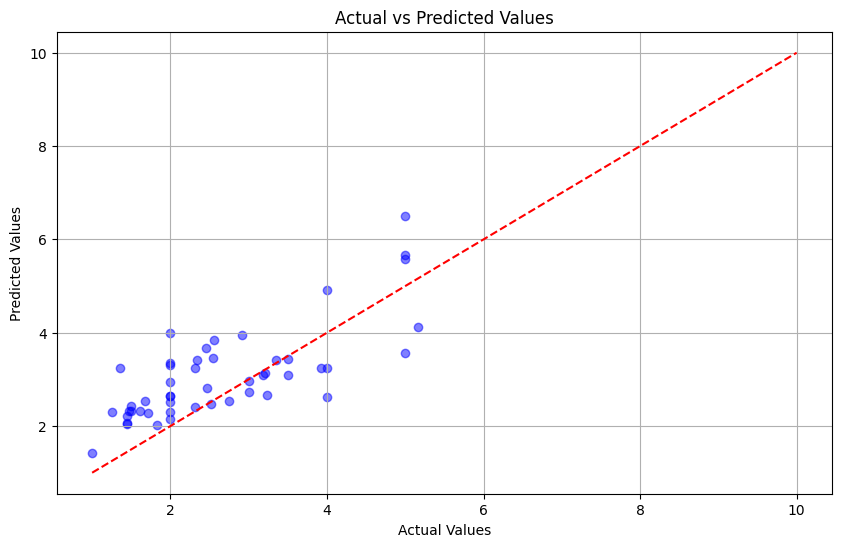

In [14]:
# Evaluating the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
# Plotting the Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values') 
plt.ylabel('Predicted Values')
plt.grid()
plt.show() 

# Ridge Regression (L2) Coding in Python

In [15]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Load the tips dataset
tips = sns.load_dataset('tips')

# Use total_bill and size as independent variables, and tip as dependent variable
X = tips[['total_bill', 'size']]
y = tips['tip']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Best alpha: 2.782559402207126


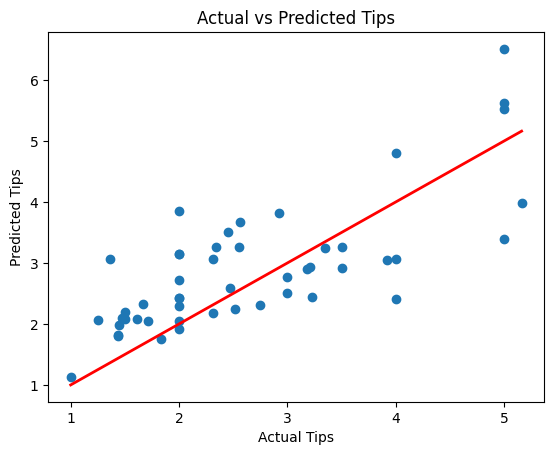

In [16]:
# Set up the Ridge model
ridge = Ridge()

# Define the hyperparameters for Grid Search
param_grid = {'alpha': np.logspace(-4, 4, 10)}

# Set up the Grid Search with cross-validation
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=20, scoring='neg_mean_squared_error')

# Fit the model with Grid Search
grid_search.fit(X_train_scaled, y_train)
best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

# Make predictions
y_pred = grid_search.predict(X_test_scaled)

# Plotting actual vs predicted
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted Tips')
plt.xlabel('Actual Tips')
plt.ylabel('Predicted Tips')
plt.show()